In [1]:
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
import matplotlib.pyplot as plt

In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0 

In [17]:
# x_train shape -> (60000, 28, 28) 
# 우리는 실험에 사용할 첫번째 train image 를 가져와서, shape조절해줘야함.
image = x_train[922]
image = image[tf.newaxis, ..., tf.newaxis] # 네트워크에 흘려보내기 위해 모양을 맞추는 과정. ...은 나머지 다

In [19]:
image.shape # 위의 모양 맞추는결과, 

(1, 28, 28, 1)

In [21]:
conv_layer1 = tf.keras.layers.Conv2D(6, (5,5), activation='sigmoid', input_shape=(28,28,1)) # param : 필터갯수, 필터크기, 활성화 함수, 레이어지정(첫번째 레이어 경우 지정해준다.)

In [22]:
image = tf.cast(image, dtype=tf.float32) # 이미지를 텐서플로우 이미지로 변환해줌.

In [23]:
out1 = conv_layer1(image) 

In [24]:
conv_layer1.get_weights()[0].shape, conv_layer1.get_weights()[1].shape # 5x5 필터 인풋노드 1채널,아웃풋노드6으로 .,, 편향이 6

((5, 5, 1, 6), (6,))

In [25]:
weights1 = conv_layer1.get_weights()[0]

In [26]:
weights1.shape

(5, 5, 1, 6)

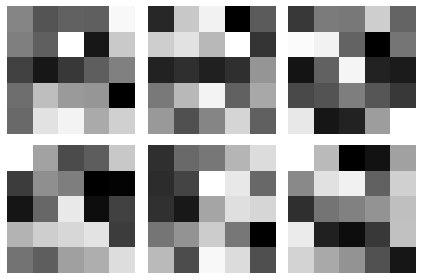

In [27]:
# subplot
fig, axs = plt.subplots(2,3)

for i in range(2):
  for j in range(3):
    axs[i][j].imshow(weights1[:,:,0,(i*3) + j], cmap='gray')
    axs[i][j].axis('off')
plt.tight_layout()

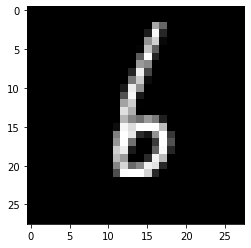

In [30]:
plt.imshow(x_train[922], cmap='gray')

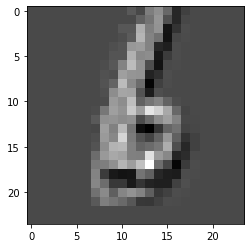

In [32]:
plt.imshow(out1[0,:,:,0], cmap='gray')

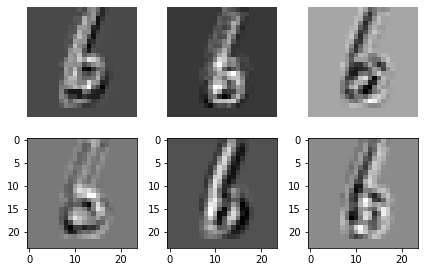

In [33]:
# subplot
fig, axs = plt.subplots(2,3)

for i in range(2):
  for j in range(3):
    axs[i][j].imshow(out1[0,:,:,(i*3) + j], cmap='gray')
    if i==0:
      axs[i][j].axis('off')
plt.tight_layout() 